# <span style='color:yellow;'>Topics will be covered</span>
 - Basic Prompt executions
 - Streaming vs non-streaming difference
 - Different ways to execute prompts
 - How to alter the LLM settings

# <span style='color:yellow;'>How to execute basic prompt using Semantic Kernel</span>

You have to follow the same step which we have explained in the first video. 

If you have doubts, please watch that video before this to understand the process of execution.


[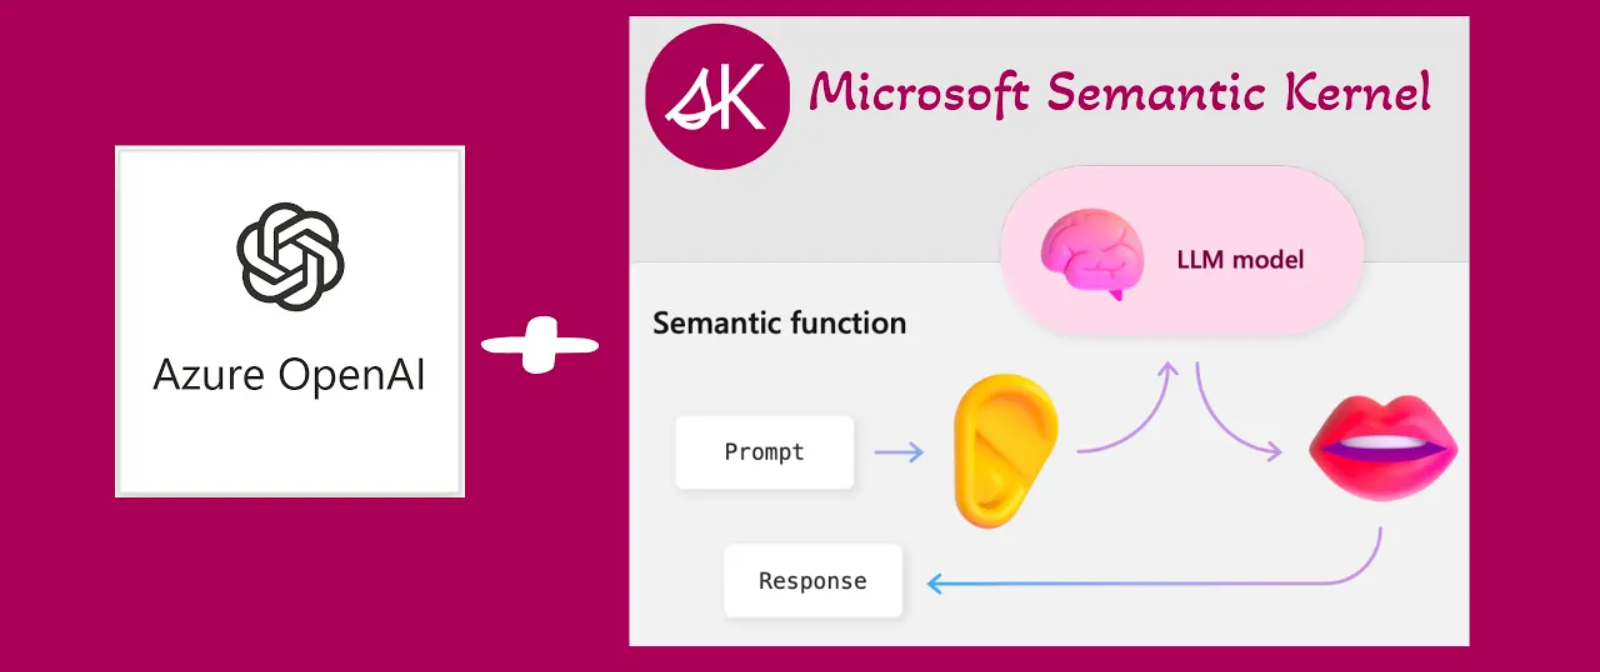](https://youtu.be/f4dTD4zO5D0?si=Is8Sf1ccFJq6sYLL)


# <span style='color:yellow;'>If you want to understand more about LLM settings.</span>
Please watch below video where I have explained lot of settings and some important prompt engineering techniques.


[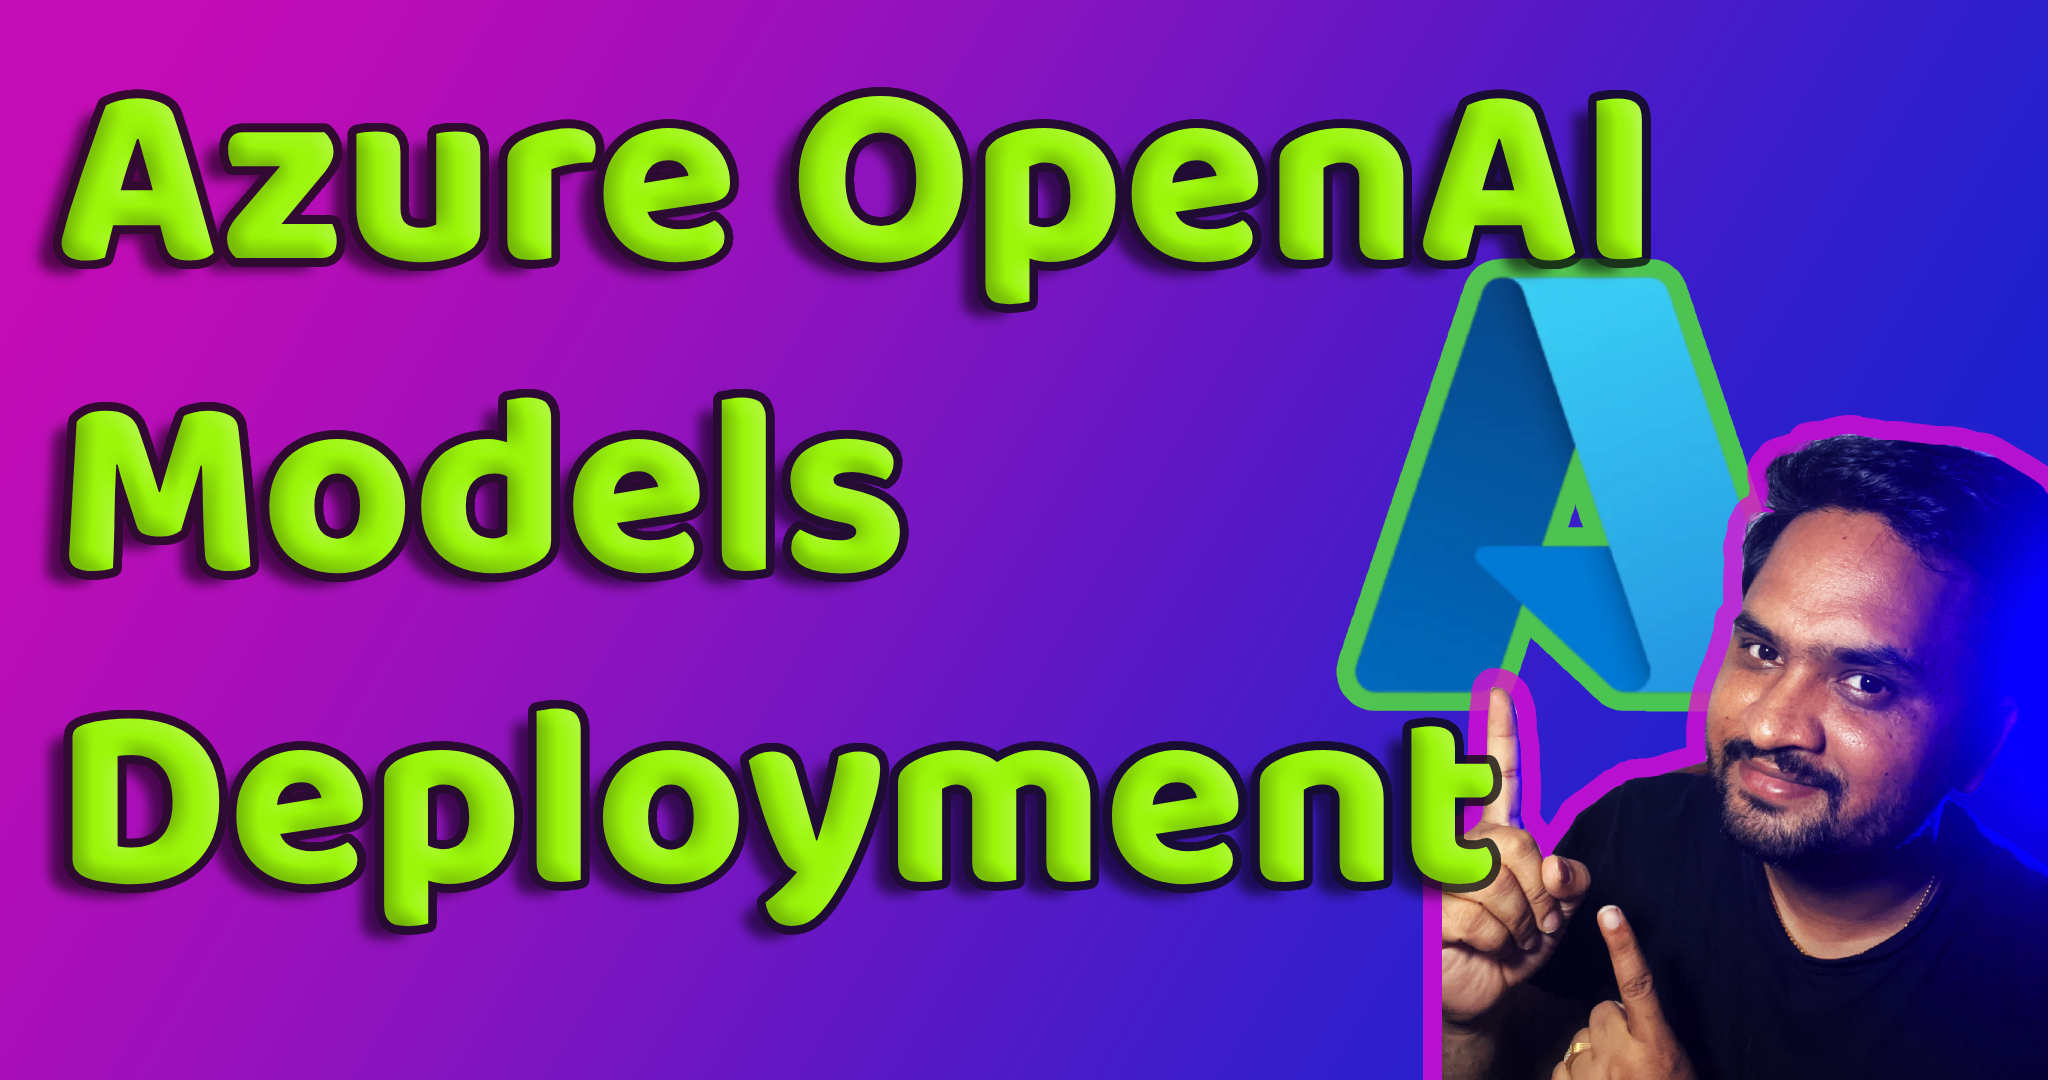](https://www.youtube.com/watch?v=9hiV2U5HeX0)


# <span style='color:yellow;'>Installing required nuget packages</span>

In [14]:
#r "nuget: Microsoft.SemanticKernel, 1.7.1"
#r "nuget: DotNetEnv, 2.2.0"

Installed Packages DotNetEnv, 2.2.0 Microsoft.SemanticKernel, 1.7.1

# <span style='color:yellow;'>Importing required namespaces</span>


In [15]:
using Microsoft.SemanticKernel;
using Kernel = Microsoft.SemanticKernel.Kernel;
using System.Diagnostics;
using Microsoft.SemanticKernel.Connectors.OpenAI;

# <span style='color:yellow;'>Loading environment variables</span>

In [16]:
using DotNetEnv;
Env.Load();
var endpoint = Environment.GetEnvironmentVariable("AOAIEndPoint");
var apikey = Environment.GetEnvironmentVariable("AOAIApiKey");
var deployementName = "gpt-4-1106";


# <span style='color:yellow;'>Building Kernel</span>

In [17]:

var skBuilder = Kernel.CreateBuilder();

var kernel = skBuilder
.AddAzureOpenAIChatCompletion(deployementName,endpoint,apikey)
.Build();

# <span style='color:yellow;'> Creating Prompt</span>

In [18]:
string programmingLanguage = "rust";

In [19]:
string prompt = $"""
Prepare a learning path to the student to get started with topic mentioned below.

#Instructions:
1. The respond should contain the learning path that should help to get hands from beginer to advanced.
2. Include topic name and practice MOQs or problem solving exercises or sample questions.
3. Only respond to the topics for Programming languages.
4. If there is a request for anything apart Programming languages, just say "Hey, I am programmed to help you with the creating learning path for any programming languages. Please ask show intrest on any programming language. :) "

#topic
'{programmingLanguage}'

#Output Instructions:
Respond should be in plain text.
Include relevant links for references

""";

# <span style='color:yellow;'>Setting up LLM settings</span>

In [20]:
OpenAIPromptExecutionSettings openAIPromptExecutionSettings = new()
{
    MaxTokens=500,
    Temperature=0.1,
    ChatSystemPrompt = """
        You are an intelligent artifical chat bot, who is specialized in many programming languages. 
        And always empowring Indian regional developers.
        Respond in English language only each line.
        Be short and precise with minimum details
    """
};

var args = new KernelArguments(openAIPromptExecutionSettings);


# <span style='color:yellow;'>InvokePrompt </span>
This will get entire response in one go - user have to wait for full response.


In [21]:


var watch = Stopwatch.StartNew();

var chatResposne =await kernel.InvokePromptAsync(prompt,args);
watch.Stop();
Console.WriteLine($"Time took to finish : {watch.ElapsedMilliseconds} in milli seconds ");
Console.WriteLine(chatResposne);

 

Time took to finish : 81579 in milli seconds 
Learning Path for Rust Programming Language:

1. **Introduction to Rust:**
   - Learn the basics of Rust, including syntax, variables, data types, and control flow.
   - Resource: [The Rust Programming Language Book](https://doc.rust-lang.org/book/)

2. **Ownership and Borrowing:**
   - Understand Rust's unique ownership system, borrowing, and lifetimes.
   - Resource: [Rust By Example - Ownership](https://doc.rust-lang.org/rust-by-example/scope.html)

3. **Structs and Enums:**
   - Dive into Rust's data structures, such as structs and enums, and learn how to use them.
   - Resource: [Rust By Example - Custom Types](https://doc.rust-lang.org/rust-by-example/custom_types.html)

4. **Error Handling:**
   - Learn how to handle errors in Rust using `Result` and `Option` types.
   - Resource: [Rust Book - Error Handling](https://doc.rust-lang.org/book/ch09-00-error-handling.html)

5. **Generics and Traits:**
   - Understand how to use generics a

# <span style='color:yellow;'>InvokePrompt-streaming</span>
This will get you the tokens generated as part of the full response - user will not feel delayed.

In [26]:
var watch = Stopwatch.StartNew();
var chatCompletion = kernel.InvokePromptStreamingAsync<string>(prompt,args);
bool first=false;
await foreach(var chat in chatCompletion)
{
    if(!first)
    {
        first = true;
        Console.WriteLine($"First token generated by {watch.ElapsedMilliseconds} milliseconds");

    }
    Console.Write(chat);
}
watch.Stop();
Console.WriteLine($"Time took to finish : {watch.ElapsedMilliseconds} in milli seconds ");


First token generated by 11856 milliseconds
# Rust Programming Language Learning Path

**Beginner Level:**
1. **Introduction to Rust:**
   - Learn the basics of Rust, its syntax, and why it's different from other languages.
   - Resource: [The Rust Programming Language Book](https://doc.rust-lang.org/book/)

2. **Setup Development Environment:**
   - Install Rust using rustup and set up your development environment.
   - Resource: [Rust Installation Guide](https://www.rust-lang.org/tools/install)

3. **Hello World and Basic Concepts:**
   - Write your first Rust program and understand basic concepts like variables, data types, and control flow.
   - Resource: [Rust By Example](https://doc.rust-lang.org/rust-by-example/)

4. **Ownership and Borrowing:**
   - Grasp Rust's unique ownership system, including borrowing, slices, and lifetimes.
   - Resource: [Understanding Ownership](https://doc.rust-lang.org/book/ch04-00-understanding-ownership.html)

5. **Practice Exercises:**
   - Solve s

# <span style='color:yellow;'>Loading prompt from text file</span>
Instead of keeping the prompt within code, its better to segregate that in seperate files.
And then read that file using inbuilt IO functions to read the text.

In [23]:
using System.IO;
string filePath = Path.Combine(Environment.CurrentDirectory, "BasicPrompt.txt");
string promptText;
using (StreamReader reader = new StreamReader(filePath))
            {
               promptText = await reader.ReadToEndAsync();
            }


# <span style='color:yellow;'>You need to use magic variables if you are reading from file</span>

In [24]:
args.Add("programmingLanguage",programmingLanguage);

var output = await kernel.InvokePromptAsync(promptText,args);
Console.WriteLine(output);

Learning Path for Rust:

1. **Introduction to Rust:**
   - Start with the basics of Rust by visiting the official Rust website (https://www.rust-lang.org/learn).
   - Read "The Rust Programming Language" book available online for free (https://doc.rust-lang.org/book/).

2. **Setup Development Environment:**
   - Install Rust using rustup (https://rustup.rs/).
   - Learn to use Cargo, Rust's build system and package manager (https://doc.rust-lang.org/cargo/).

3. **Basic Concepts:**
   - Understand ownership, borrowing, and lifetimes.
   - Practice with simple exercises like "Hello, world!" and variable bindings.

4. **Control Flow:**
   - Learn about if/else, loops, and pattern matching.
   - Solve problems that require conditional logic and iteration.

5. **Data Structures:**
   - Get familiar with Rust's data structures like structs, enums, and tuples.
   - Implement basic data structures and solve related exercises.

6. **Error Handling:**
   - Learn Rust's error handling model usin